In [122]:
%load_ext autoreload
%autoreload 2


import numpy as np
import networkx as nx
import logging, sys
import cstrees.scoring as sc
import cstrees.cstree as ct

import matplotlib.pyplot as plt

logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)

# CStree from Figure 1 in (Duarte & Solus, 2022)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [162]:
np.random.seed(3)
p=4
cards = [2] * p
co = ct.CausalOrder(range(p))
tree = ct.CStree(co)


#stage = ct.sample_random_stage(cards,2)
#stage.set_random_params(cards)

tree.set_cardinalities(cards)

# These do not have to be in a dict like this as the levels are
# determined from the length of the tuples.

tree.set_stages({
    0: [],
    1: [ct.Stage([{0, 1}, 0])],    # Green
    2: [ct.Stage([0, {0, 1}, 0]),  # Blue
        ct.Stage([0, {0, 1}, 1]),  # Orange
        ct.Stage([1, {0, 1}, 0])]  # Red
})


tree.set_random_stage_parameters()


a = tree.plot()
a.draw("testplot.png")
x = tree.sample(5)

#x = tree.sample(5)
print(x)

s = sc.score(tree, x, alpha_tot=1.0, method="K2")
print(s)
#rels = tree.csi_relations()

#print("Initial rels")
#print(rels)
adjmats = tree.to_minimal_context_graphs()

for key, graph in adjmats.items():
    agraph = nx.nx_agraph.to_agraph(graph)
    agraph.layout("dot")
    agraph.draw(str(key) + "_csi.png", args='-Glabel="'+str(key)+'"   ')
a

KeyError: 'cond_prob'

In [191]:

p=4
cards = [2] * p

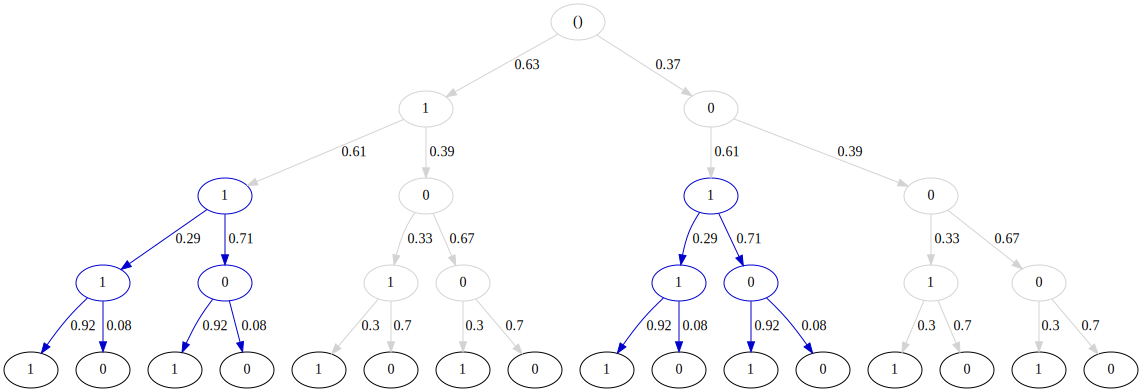

In [192]:
np.random.seed(5)

t = ct.sample_cstree(cards, max_cvars=1, prob_cvar=0.5, prop_nonsingleton=1)
t.set_random_stage_parameters()
t.create_tree()
t.set_random_parameters()
a = t.plot()
x = t.sample(1000)
#plt.savefig("testplot.png")

true_cdags = t.to_minimal_context_graphs()
for key, val in true_cdags.items():
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
    agraph.draw("testing/"+str(key) + "_true.png", args='-Glabel="'+str(key)+'"   ')
a

Level 0
[{0, 1}] {0: 383, 1: 617}
Level 1
[{0, 1}, 0] {0: 282, 1: 101}
[{0, 1}, 1] {1: 173, 0: 444}
Level 2
[{0, 1}, 0, {0, 1}] {0: 271, 1: 112}
[{0, 1}, 1, {0, 1}] {1: 567, 0: 50}
Level 3
Level -1
[] {1: 607, 0: 393}


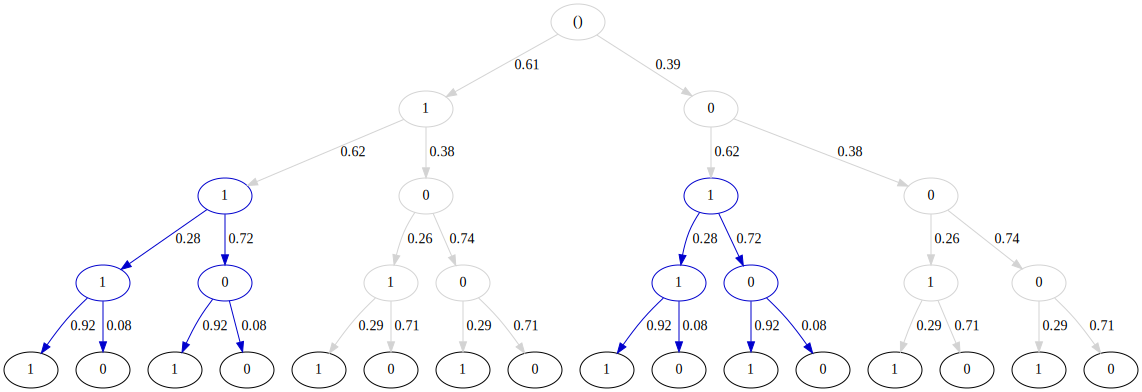

In [193]:
t.estimate_stage_parameters(x, alpha_tot=1.0, method="BDeu")
t.create_tree()
t.set_random_parameters()
a = t.plot()
a

In [194]:
order = [0, 1, 2]

perm = [1,0,2]
xperm = x[:, perm]

#order = [2,0, 1, 3]

s1 = sc.score_order(order, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
s2 = sc.score_order(perm, xperm, max_cvars=1, alpha_tot=1.0, method="BDeu")
print(s1)
print(s2)

-1933.8215002131037
-1933.8215002131037


order: [0, 1, 2, 3], score: -2346.1450581416934
order: [0, 1, 3, 2], score: -2346.1450581416934
order: [0, 2, 1, 3], score: -2346.1450581416934
order: [0, 2, 3, 1], score: -2346.145058141694
order: [0, 3, 1, 2], score: -2346.145058141694
order: [0, 3, 2, 1], score: -2346.145058141694
order: [1, 0, 2, 3], score: -2346.1450581416934
order: [1, 0, 3, 2], score: -2346.1450581416934
order: [1, 2, 0, 3], score: -2346.1450581416934
order: [1, 2, 3, 0], score: -2346.1450581416934
order: [1, 3, 0, 2], score: -2346.1450581416934
order: [1, 3, 2, 0], score: -2346.1450581416934
order: [2, 0, 1, 3], score: -2346.1450581416934
order: [2, 0, 3, 1], score: -2346.145058141694
order: [2, 1, 0, 3], score: -2346.1450581416934
order: [2, 1, 3, 0], score: -2346.1450581416934
order: [2, 3, 0, 1], score: -2346.145058141694
order: [2, 3, 1, 0], score: -2346.145058141694
order: [3, 0, 1, 2], score: -2346.145058141694
order: [3, 0, 2, 1], score: -2346.145058141694
order: [3, 1, 0, 2], score: -2346.145058141694
o

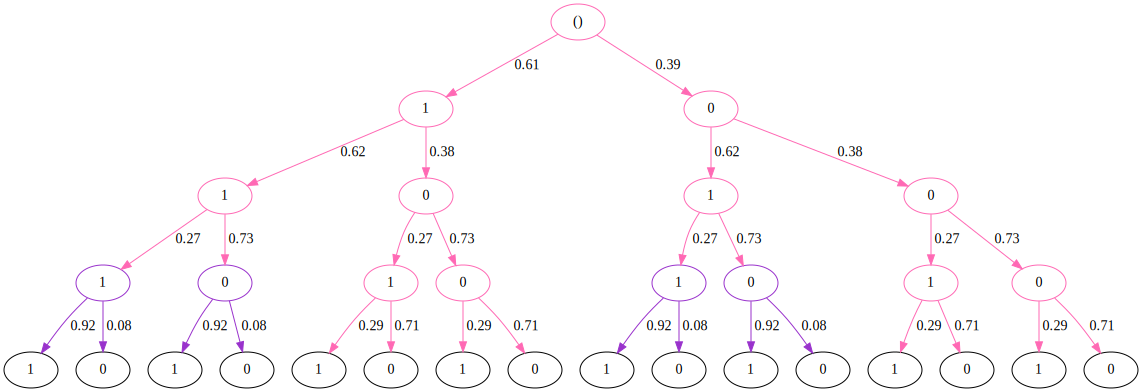

In [195]:
optord, score = ct.find_optimal_order(x, strategy="max", max_cvars=1, alpha_tot=1.0, method="BDeu")
print("optimal order: {}, score {}".format(optord, score))

opttree = ct.optimal_cstree(optord, cards, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
print("stages :{}".format(opttree.stages))
opttree.estimate_stage_parameters(x, alpha_tot=1.0, method="BDeu")
opttree.create_tree()
opttree.set_random_parameters()
opttree.plot()

In [197]:
cdags = opttree.to_minimal_context_graphs()
for key, graph in cdags.items():
    print("key: {}".format(key))
    print(graph.edges())
    print(graph.nodes())
    


key: None
[(1, 3)]
[0, 1, 2, 3]


max staging: ['[]']
max staging: ['[{0, 1}]']
max staging: ['[{0, 1}, 0]', '[{0, 1}, 1]']
max staging: ['[{0, 1}, 0, {0, 1}]', '[{0, 1}, 1, {0, 1}]']
Level 0
[{0, 1}] {1: 704, 0: 296}
Level 1
[{0, 1}, 1] {1: 397, 0: 307}
[{0, 1}, 0] {0: 188, 1: 108}
Level 2
[{0, 1}, 1, {0, 1}] {0: 696, 1: 8}
[{0, 1}, 0, {0, 1}] {0: 245, 1: 51}
Level 3
Level -1
[] {1: 311, 0: 689}


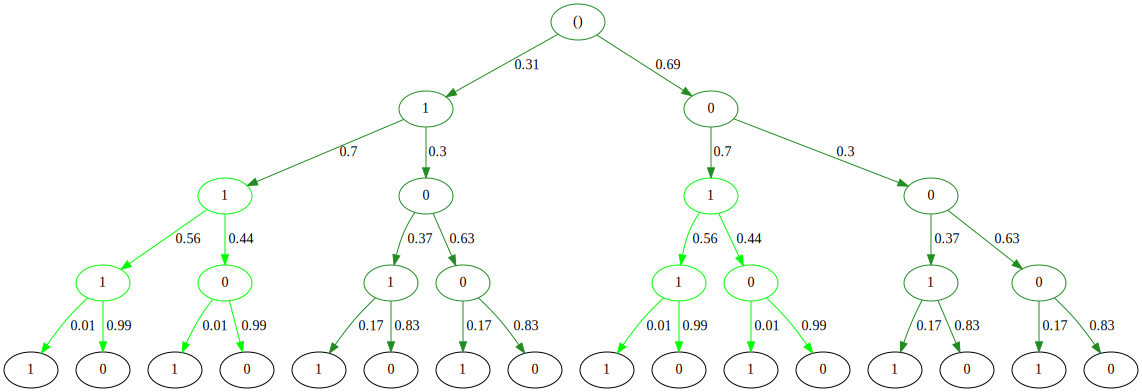

In [154]:
order = [0, 1, 2, 3]

opttree = ct.optimal_cstree(order, cards, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
#print("stages :{}".format(opttree.stages))
opttree.estimate_stage_parameters(x, alpha_tot=1.0, method="BDeu")
opttree.create_tree()
opttree.set_random_parameters()
opttree.plot()

In [ ]:
optord = ct.find_optimal_order(x, max_cvars=1, alpha_tot=1.0, method="BDeu")

In [ ]:

order = [0, 1, 2, 3]
score = sc.score_order(order, cards, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
print(score)
 

In [ ]:
stagings = ct.all_stagings(order, cards, level, max_cvars=1)
print("#Stagings")
nst = ct.n_stagings(order, cards, level, max_cvars=1)
print(nst)
print("Stagings")
for ss in stagings:
    for s in ss:
        print(s)

In [ ]:
for l in range(len(order)):
    max_staging, max_score = ct.optimal_staging_at_level(order, cards, x, l, max_cvars=1, alpha_tot=1.0, method="BDeu")
    print("best staging at level {}".format(l))
    print(max_score)   
    for st in max_staging:
        print(st)

    